<a href="https://colab.research.google.com/github/cihan53/karakter_frekans/blob/main/sayisal_video_isleme_odev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bu ödevde gri bir resimdeki parazitleri alçak geçirgen filtre kullanarak temizlemeniz istenmektedir.

* Görüntü dosyasının okunması: Görüntü dosyası “pgm” formatındadır. Bu formatı çözerek, görüntüyü bir matrise yerleştiriniz.
*  Alçak geçirgen filtre uygulanması: Görüntüye ortalama filtresi ve medyan filtresi uygulayan iki ayrı modül yazınız.
* Filtrelenmiş görüntülerin pgm formatında dosyaya yazılması: Filtreleme işlemi sonucunda elde ettiğiniz görüntüleri “pgm” formatında yeni bir dosyaya yerleştiren modülü yazınız.

In [ ]:
# The standard way to import NumPy:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


FILE_NAME=["balloonsNpgm.pgm","galaxy.pgm","glassN.pgm","lenaN.pgm"]

#pgm reader , header bilgileri kullanılarak genişlik yükseklik bulunuyor.
def pgmread(filepath):
    with open(filepath, 'rb') as f:
        # Read header information
        count = 0
        while count < 3:
            line = f.readline()
            if chr(line[0]) == '#':  # yorum satırlarını sil
                continue
            count = count + 1
            if count == 1:  # Magic num info
                magicNum = line.strip().decode("utf-8")
                if magicNum != 'P2' and magicNum != 'P5':
                    f.close()
                    print('Hatali PGM file')
                    exit()
            elif count == 2:  # Width and Height
                [width, height] = (line.strip()).split()
                width = int(width)
                height = int(height)
            elif count == 3:  # Max gray level
                maxVal = int(line.strip())
        # Read pixels information
        img = []
        buf = f.read()
        elem = buf.split()
        if magicNum == 'P2' and len(elem) != width * height:
            print('pixel sayisi hatali')
            exit()
        elif magicNum == 'P5' and len(buf) != width * height:
            print('pixel sayisi hatali')
            exit()

        index=0
        for i in range(height):
            tmpList = []
            for j in range(width):
                if magicNum == 'P5':
                    int_val = buf[index]
                    # int_val = int.from_bytes(byte_val, "little")
                    tmpList.append(int_val)
                    index+=1
                elif magicNum == 'P2':
                    tmpList.append(int(elem[i * width + j]))
            img.append(tmpList)

    return (np.array(img), (height,width),maxVal)

Mounted at /content/gdrive


# Median ve Smooting (Averaging) flitreleme fonksiyonları

In [ ]:
# ortalama filitresi uygula
def smooting_filter(image, width, height, kernel_size=3):
    # yeni bir image oluştur
    img_new = np.zeros([height, width])

    k = int((kernel_size - 1) / 2)
    for x in range(k, (width - k) - 1):
        for y in range(k, (height - k) - 1):
            toplam = 0
            for i in range(-(k), k):
                for j in range(-(k), k):
                    toplam = toplam + image[y + i, x + j]

            img_new[y, x] = toplam / (kernel_size * kernel_size)

    return img_new.astype(np.uint8)

# median filitresi uygula
def median_filter(image, width, height, kernel_size=3):
    # yeni bir image oluştur
    img_new = np.zeros([height, width])

    k = int((kernel_size - 1) / 2)
    size_item = (kernel_size * kernel_size)
    tmp = [0] * size_item
    for x in range(k, (width - k) - 1):
        for y in range(k, (height - k) - 1):
            item = 0
            for i in range(-(k), k):
                for j in range(-(k), k):
                    tmp[item] = image[y + i, x + j]
                    item += 1

            tmp = sorted(tmp)
            img_new[y, x] = tmp[int(item / 2)]

    return img_new.astype(np.uint8)



Read file  balloonsNpgm.pgm
Read file  galaxy.pgm
Read file  glassN.pgm
Read file  lenaN.pgm


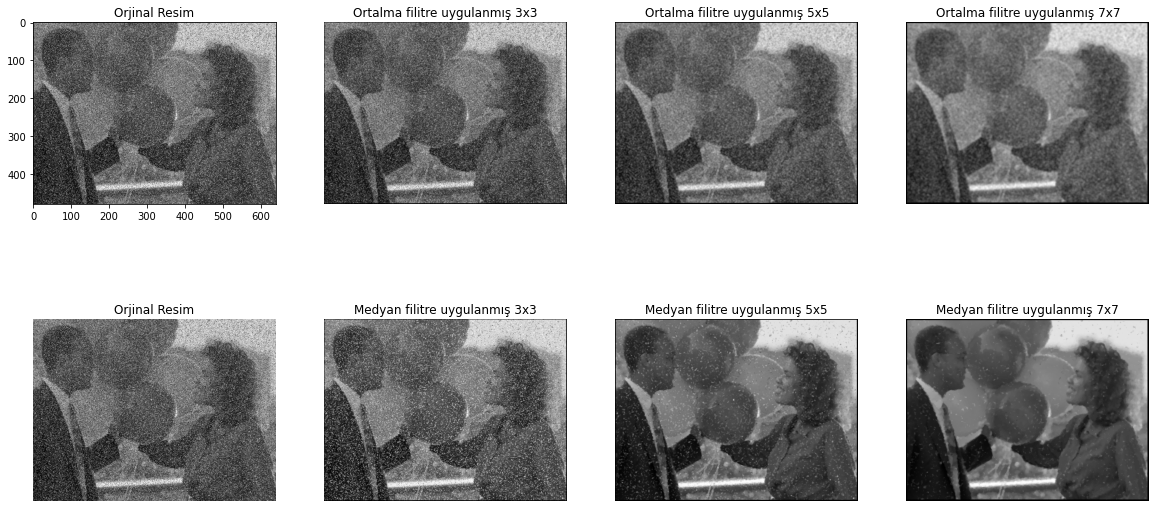

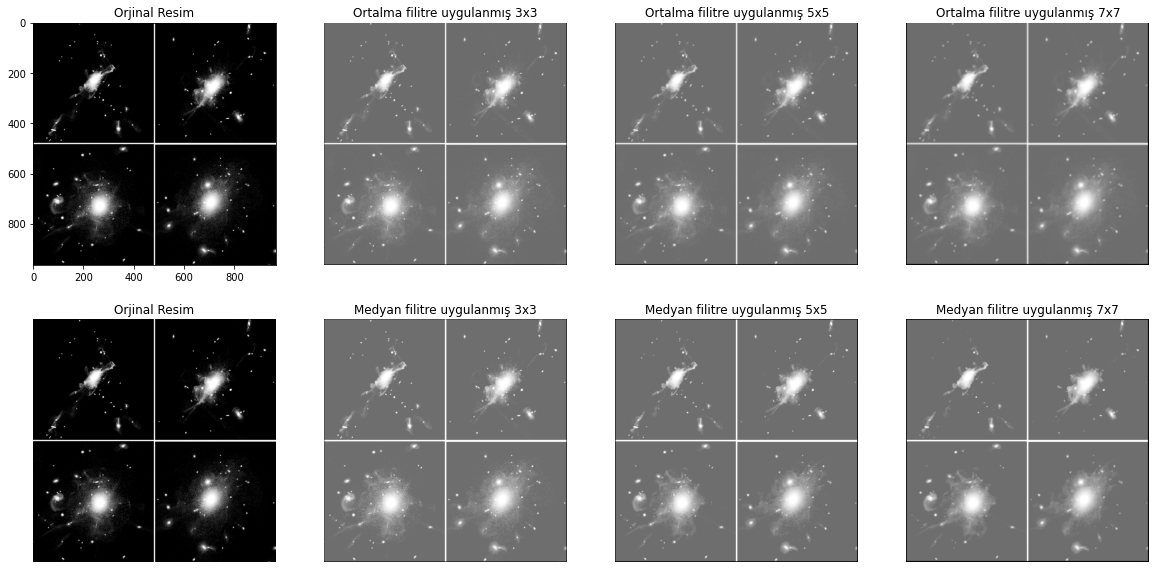

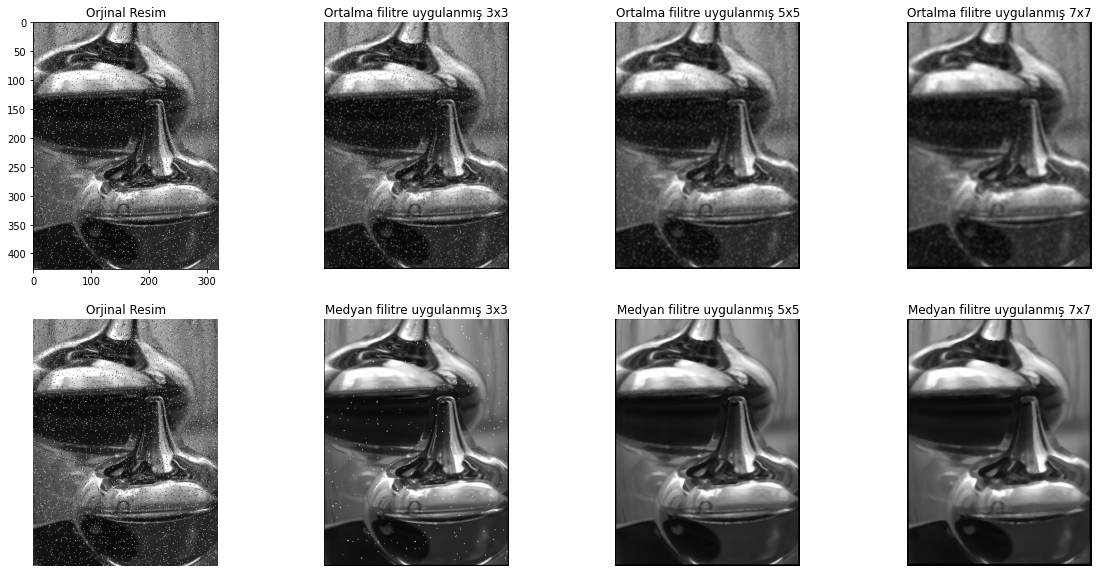

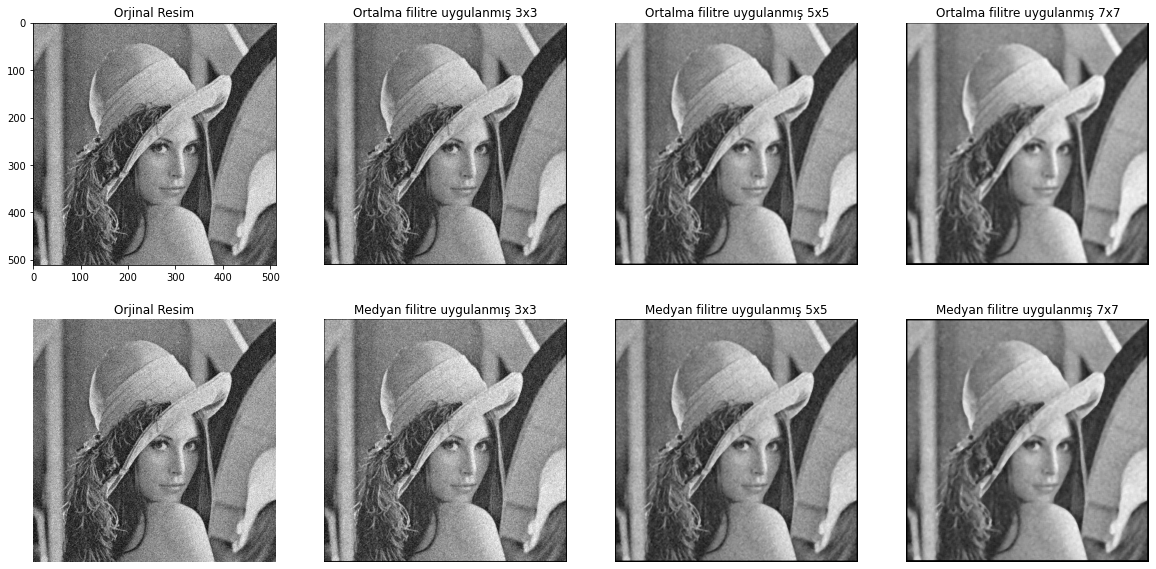

In [ ]:
  # tablo oluşturmak için
rows = 2
columns = 4

  # resim okunup matris haline getiriliyor
for file_name in FILE_NAME:
    # resim okunup matris haline getiriliyor
    print("Read file ", file_name)
    (im, (height, width), gray) = pgmread('/content/gdrive/MyDrive/Yuksek_Lisans/Sayisal_video_isleme/images/' + file_name)
    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(rows, columns, 1 )
    plt.imshow(im, cmap='gray')
    plt.title('Orjinal Resim')

    #
    #  Averaging
    #
    copy_image_shape = im
    im1_mean = smooting_filter(copy_image_shape, width, height, 3)
    fig.add_subplot(rows, columns, 2 )
    plt.imshow(im1_mean, cmap='gray')
    plt.axis('off')
    plt.title("Ortalma filitre uygulanmış 3x3")

    im1_mean = smooting_filter(copy_image_shape, width, height, 5)
    fig.add_subplot(rows, columns, 3 )
    plt.imshow(im1_mean, cmap='gray')
    plt.axis('off')
    plt.title("Ortalma filitre uygulanmış 5x5")

    im1_mean = smooting_filter(copy_image_shape, width, height, 7)
    fig.add_subplot(rows, columns, 4 )
    plt.imshow(im1_mean, cmap='gray')
    plt.axis('off')
    plt.title("Ortalma filitre uygulanmış 7x7")

    #
    #   Median Filitre
    #

    # Orjinal Resim
    fig.add_subplot(rows, columns, 5 )
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    plt.title('Orjinal Resim')

    ## filitre uygulanmış resim
    copy_image_shape = im
    im1_mean = median_filter(copy_image_shape, width, height,3)
    fig.add_subplot(rows, columns, 6 )
    plt.imshow(im1_mean, cmap='gray')
    plt.axis('off')
    plt.title("Medyan filitre uygulanmış 3x3")


    im1_mean = median_filter(copy_image_shape, width, height,5)
    fig.add_subplot(rows, columns, 7 )
    plt.imshow(im1_mean, cmap='gray')
    plt.axis('off')
    plt.title("Medyan filitre uygulanmış 5x5")

    im1_mean = median_filter(copy_image_shape, width, height,7)
    fig.add_subplot(rows, columns, 8 )
    plt.imshow(im1_mean, cmap='gray')
    plt.axis('off')
    plt.title("Medyan filitre uygulanmış 7x7")
    fig.show()

